In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.read_csv('bank-additional-full.csv')

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

## Data attributes
1. Bank client data:
> * Age (numeric)
>* Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
>* Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
>* Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
>* Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
>* Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
>* Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
>* y - has the client subscribed a term deposit? (binary: 'yes', 'no')

2. Related with the last contact of the current campaign:
>* Contact: contact communication type (categorical:
'cellular','telephone')
>* Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
…, 'nov', 'dec')
>* Day_of_week: last contact day of the week (categorical:
'mon','tue','wed','thu','fri')
>* Duration: last contact duration, in seconds (numeric)
3. Other attributes:
>* Campaign: number of contacts performed during this campaign and for
this client (numeric, includes last contact)
>* Pdays: number of days that passed by after the client was last
contacted from a previous campaign (numeric; 999 means client was not
previously contacted)
>* Previous: number of contacts performed before this campaign and for
this client (numeric)
>* Poutcome: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')
4. Social and economic context attributes
>* Emp.var.rate: employment variation rate - quarterly indicator
(numeric)
>* Cons.price.idx: consumer price index - monthly indicator (numeric)
>* Cons.conf.idx: consumer confidence index - monthly indicator
(numeric)
>* Euribor3m: euribor 3 month rate - daily indicator (numeric)
>* Nr.employed: number of employees - quarterly indicator (numeric)

## Deographic Analysis for bank clients

In [ ]:
bank_cl = data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan','y']]
bank_cl.head()

,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,unknown,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin.,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no


In [ ]:
bank_cl.describe()

,age
count,41176.00000
mean,40.02380
std,10.42068
min,17.00000
25%,32.00000
50%,38.00000
75%,47.00000
max,98.00000


* As first look we can see that the age distribution is right-skewed, as indicated by a mean that surpasses the median (Q2 at 50%).

Text(0.5, 1.0, 'Distribution of Age')

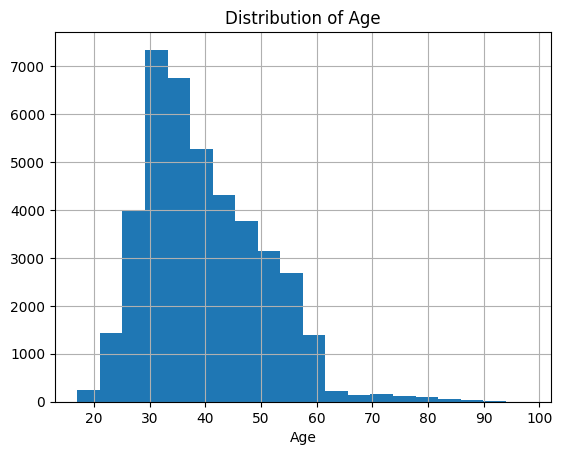

In [ ]:
bank_cl['age'].hist(bins=20)
plt.xlabel('Age')
plt.title('Distribution of Age')

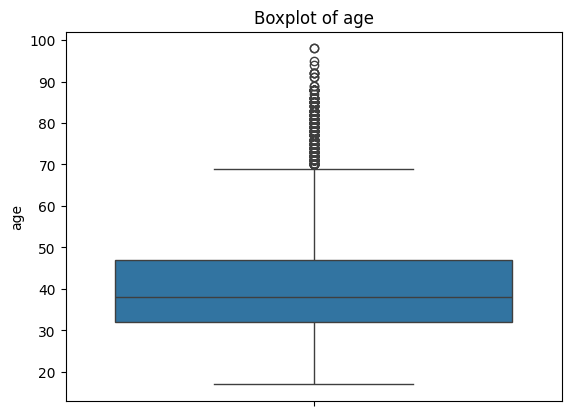

In [ ]:
sns.boxplot(data=bank_cl, y='age')
plt.title('Boxplot of age')
plt.show()

* There are outliers present in the dataset. These outliers are observed to range from the age of 70 to 98.

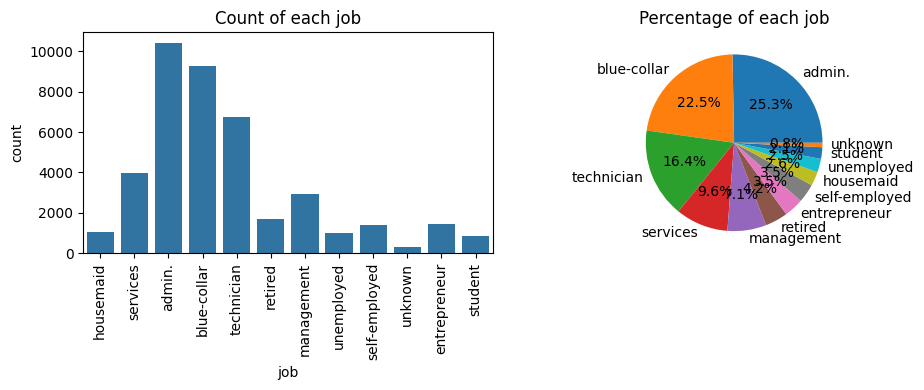

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x ='job', data = bank_cl)
plt.xticks(rotation=90)
plt.title("Count of each job")
plt.subplot(1, 2, 2)
value_counts = bank_cl['job'].value_counts()
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Percentage of each job')
plt.tight_layout()
plt.show()

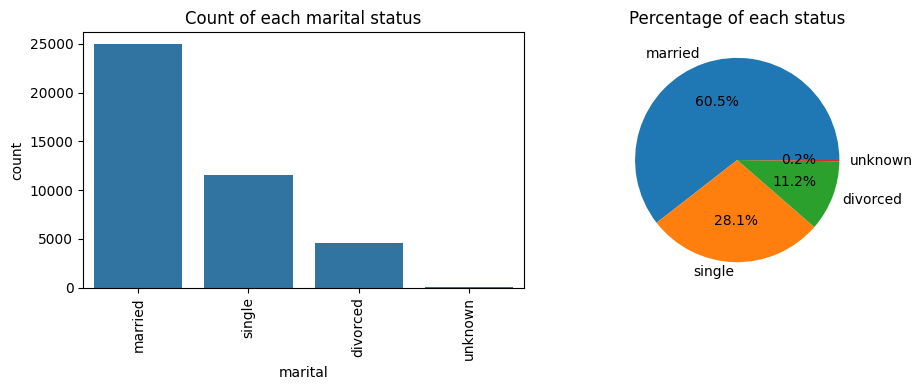

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x ='marital', data = bank_cl)
plt.xticks(rotation=90)
plt.title("Count of each marital status")
plt.subplot(1, 2, 2)
value_counts = bank_cl['marital'].value_counts()
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Percentage of each status')
plt.tight_layout()
plt.show()

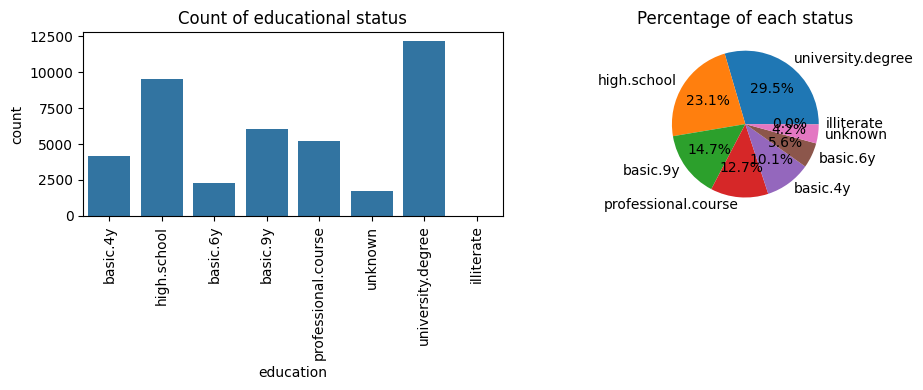

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x ='education', data = bank_cl)
plt.xticks(rotation=90)
plt.title("Count of educational status")
plt.subplot(1, 2, 2)
value_counts = bank_cl['education'].value_counts()
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Percentage of each status')
plt.tight_layout()
plt.show()

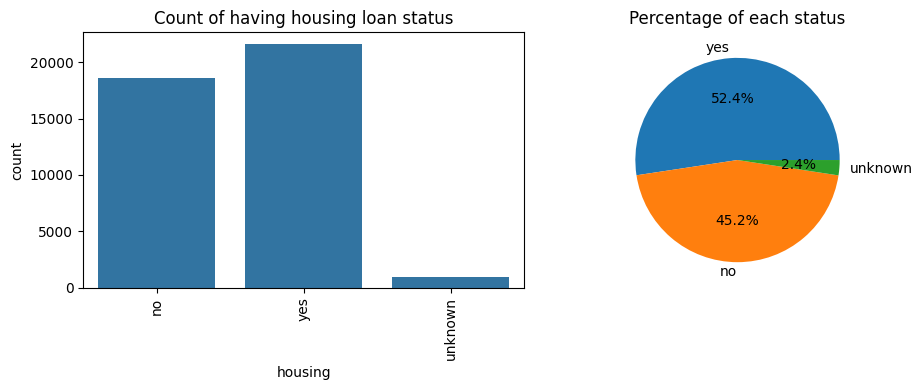

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x ='housing', data = bank_cl)
plt.xticks(rotation=90)
plt.title("Count of having housing loan status")
plt.subplot(1, 2, 2)
value_counts = bank_cl['housing'].value_counts()
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Percentage of each status')
plt.tight_layout()
plt.show()

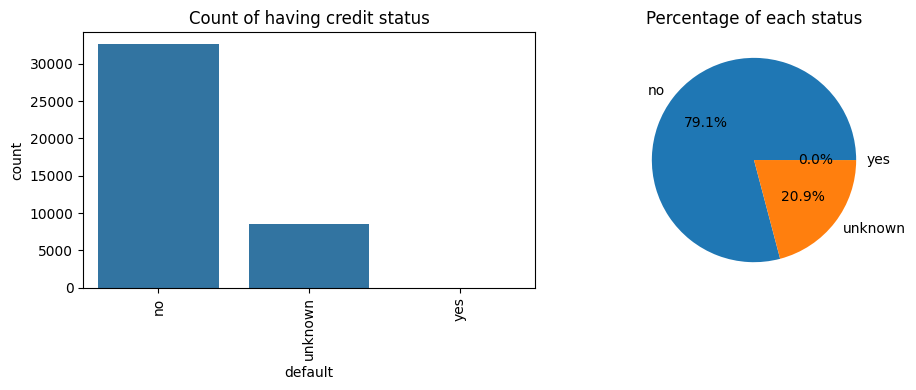

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x ='default', data = bank_cl)
plt.xticks(rotation=90)
plt.title("Count of having credit status")
plt.subplot(1, 2, 2)
value_counts = bank_cl['default'].value_counts()
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Percentage of each status')
plt.tight_layout()
plt.show()

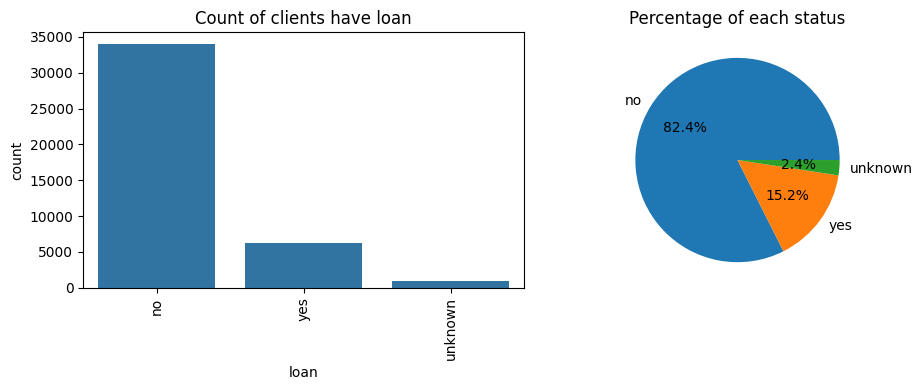

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x ='loan', data = bank_cl)
plt.xticks(rotation=90)
plt.title("Count of clients have loan")
plt.subplot(1, 2, 2)
value_counts = bank_cl['loan'].value_counts()
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Percentage of each status')
plt.tight_layout()
plt.show()

**After conducting an analysis, the following insights were obtained:**

Age:
- The average age is 40.
- The majority of clients fall within the age range of 30 to 55.

Jobs:
- Most clients work in the following fields:
  - Administration (25.3%)
  - Blue-collar (25.5%)
  - Technician (14.4%)

Marital status:
- Married clients account for 60.5%.
- Single clients make up 28.1%.
- Divorced clients represent 11.2%.

Educational status:
- The highest percentage of clients (29.5%) have a university degree.
- 23.1% of clients have completed high school.

Housing loan status:
- 52.4% of clients have a housing loan.
- 45.2% of clients do not have a housing loan.
- The status of 2.4% of clients is unknown.

Credit status:
- The majority of clients (79.1%) do not have credit.
- The credit status of 20.9% of clients is unknown.

Loan:
- 82.4% of clients do not have a loan.
- 15.2% of clients have a loan.
- The loan status of 2.4% of clients is unknown.
---




## Current Campaign Analysis

In [ ]:
df_campaign = data[['contact', 'month', 'day_of_week', 'duration','campaign', 'pdays',
       'previous', 'poutcome','y']]
df_campaign.head()

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,telephone,may,mon,261,1,999,0,nonexistent,no
1,telephone,may,mon,149,1,999,0,nonexistent,no
2,telephone,may,mon,226,1,999,0,nonexistent,no
3,telephone,may,mon,151,1,999,0,nonexistent,no
4,telephone,may,mon,307,1,999,0,nonexistent,no


In [ ]:
df_campaign.describe(include='all')

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
count,41176,41176,41176,41176.000000,41176.000000,41176.000000,41176.000000,41176,41176
unique,2,10,5,NaN,NaN,NaN,NaN,3,2
top,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,no
freq,26135,13767,8618,NaN,NaN,NaN,NaN,35551,36537
mean,NaN,NaN,NaN,258.315815,2.567879,962.464810,0.173013,NaN,NaN
std,NaN,NaN,NaN,259.305321,2.770318,186.937102,0.494964,NaN,NaN
min,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,NaN


Text(0.5, 1.0, 'Distribution of Call duration')

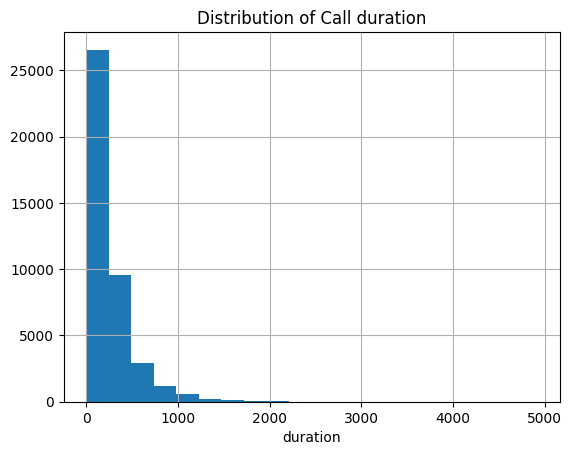

In [ ]:
df_campaign['duration'].hist(bins=20)
plt.xlabel('duration')
plt.title('Distribution of Call duration')

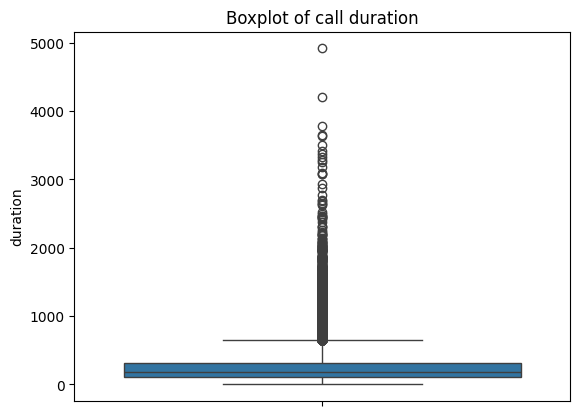

In [ ]:
sns.boxplot(data=df_campaign, y='duration')
plt.title('Boxplot of call duration')
plt.show()

Text(0.5, 1.0, 'Count of calls per month')

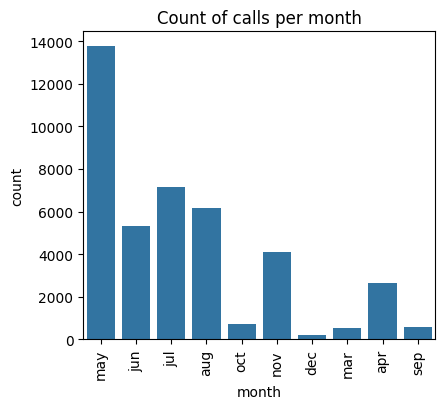

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x ='month', data =df_campaign)
plt.xticks(rotation=90)
plt.title("Count of calls per month")

Text(0.5, 1.0, 'Count of calls per weeks days')

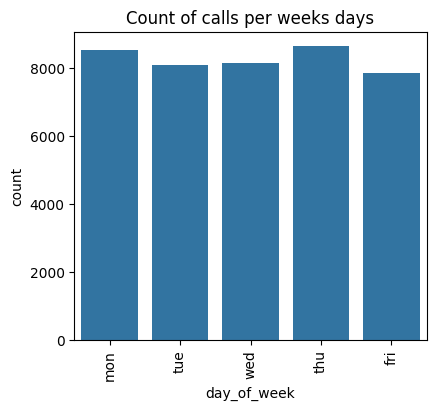

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x ='day_of_week', data =df_campaign)
plt.xticks(rotation=90)
plt.title("Count of calls per weeks days")


In [ ]:
mask = df_campaign['y'] == 'yes'
new_df = df_campaign[mask]
new_df.head()

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
75,telephone,may,mon,1575,1,999,0,nonexistent,yes
83,telephone,may,mon,1042,1,999,0,nonexistent,yes
88,telephone,may,mon,1467,1,999,0,nonexistent,yes
129,telephone,may,mon,579,1,999,0,nonexistent,yes
139,telephone,may,mon,461,1,999,0,nonexistent,yes


In [ ]:
new_df.describe(include = 'all')

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
count,4639,4639,4639,4639.000000,4639.000000,4639.000000,4639.000000,4639,4639
unique,2,10,5,NaN,NaN,NaN,NaN,3,1
top,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,yes
freq,3852,886,1044,NaN,NaN,NaN,NaN,3140,4639
mean,NaN,NaN,NaN,553.256090,2.051951,791.990946,0.492779,NaN,NaN
std,NaN,NaN,NaN,401.190736,1.666353,403.439220,0.860406,NaN,NaN
min,NaN,NaN,NaN,37.000000,1.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,253.500000,1.000000,999.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,449.000000,2.000000,999.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,741.500000,2.000000,999.000000,1.000000,NaN,NaN


Text(0.5, 1.0, 'Count of calls per month')

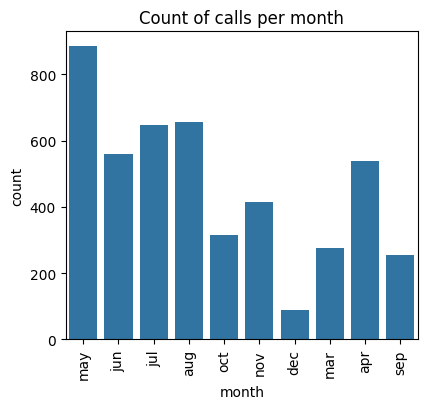

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x ='month', data =new_df)
plt.xticks(rotation=90)
plt.title("Count of calls per month")

Text(0.5, 1.0, 'Distribution of Call duration')

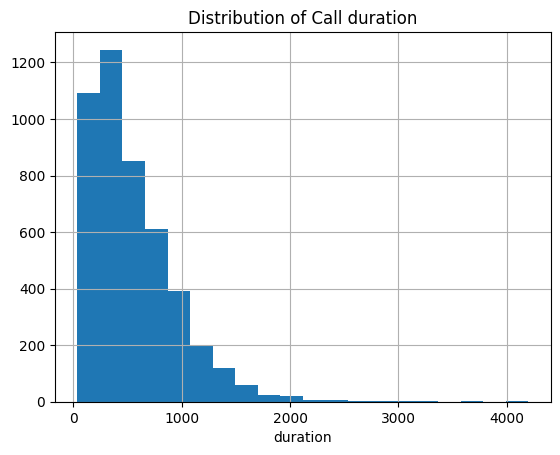

In [ ]:
new_df['duration'].hist(bins=20)
plt.xlabel('duration')
plt.title('Distribution of Call duration')

Text(0.5, 1.0, 'Count of each campaign outcome')

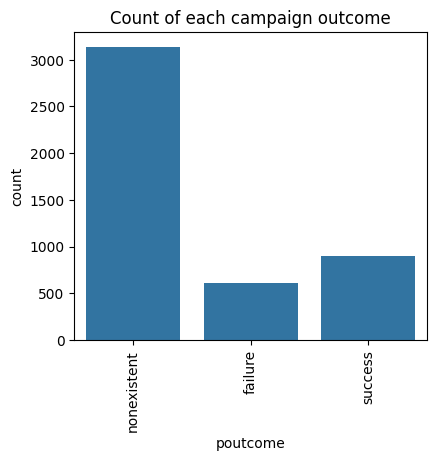

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x ='poutcome', data =new_df)
plt.xticks(rotation=90)
plt.title("Count of each campaign outcome")

In [ ]:
mask = df_campaign['poutcome'] == 'success'
df2 = df_campaign[mask]
df2.head()

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
24108,telephone,nov,wed,119,1,6,1,success,no
24264,cellular,nov,mon,112,1,4,1,success,no
24279,cellular,nov,mon,94,1,4,1,success,no
24397,cellular,nov,mon,77,1,3,1,success,no
24482,cellular,nov,mon,200,2,4,1,success,no


Text(0.5, 1.0, 'Count of calls during this campaign for success case')

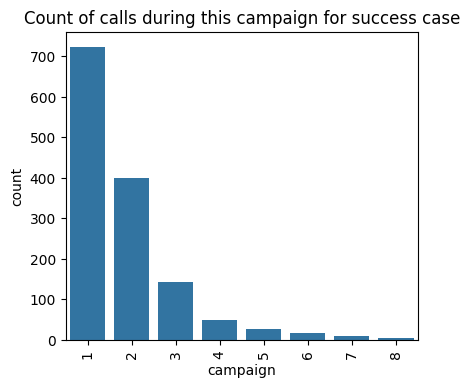

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x ='campaign', data =df2)
plt.xticks(rotation=90)
plt.title("Count of calls during this campaign for success case")

Text(0.5, 1.0, 'Count of calls before this campaign for success case')

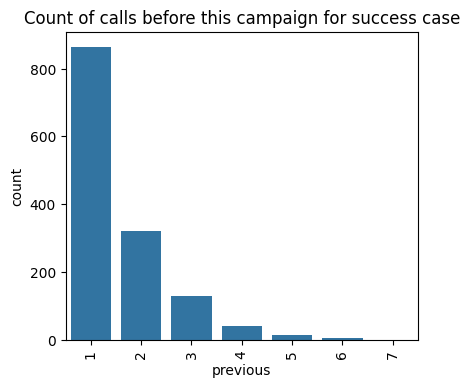

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x ='previous', data =df2)
plt.xticks(rotation=90)
plt.title("Count of calls before this campaign for success case")

Text(0.5, 1.0, 'Count of days passed between last campaign call and this campaign call for success case')

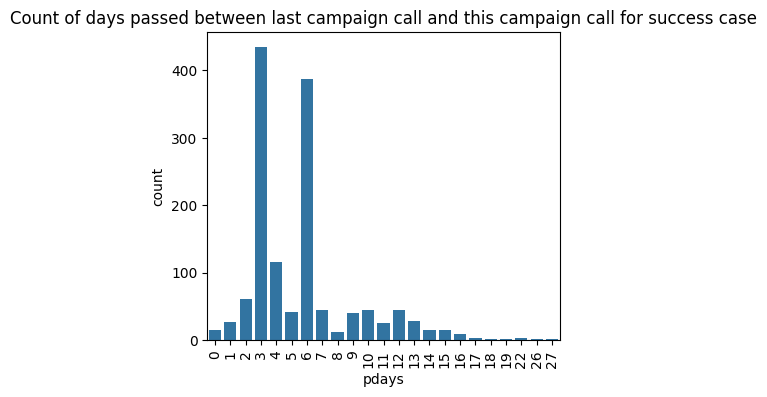

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x ='pdays', data =df2)
plt.xticks(rotation=90)
plt.title("Count of days passed between last campaign call and this campaign call for success case")

In [ ]:
mask = df_campaign['poutcome'] == 'failure'
df3 = df_campaign[mask]
df3.head()

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
24013,telephone,oct,tue,39,1,999,1,failure,no
24019,telephone,oct,tue,144,1,999,1,failure,yes
24076,telephone,nov,wed,449,1,999,1,failure,no
24102,telephone,nov,wed,114,1,999,1,failure,yes
24113,telephone,nov,thu,86,1,999,1,failure,no


Text(0.5, 1.0, 'Count of calls during this campaign for failure case')

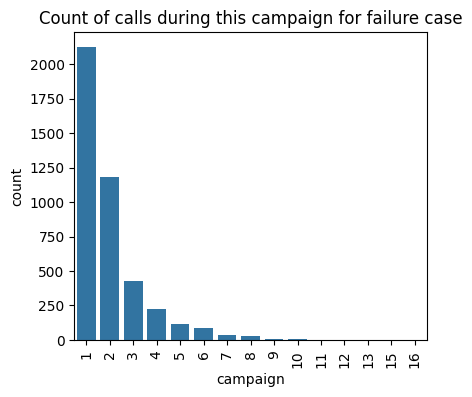

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x ='campaign', data =df3)
plt.xticks(rotation=90)
plt.title("Count of calls during this campaign for failure case")

Text(0.5, 1.0, 'Count of calls before this campaign for failure case')

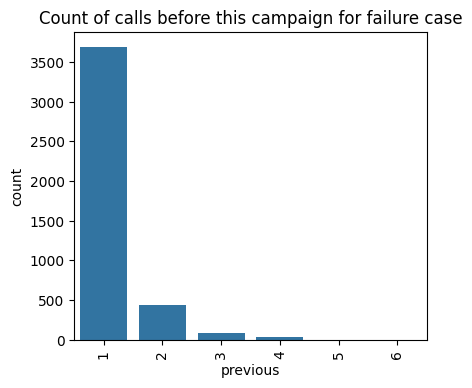

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x ='previous', data =df3)
plt.xticks(rotation=90)
plt.title("Count of calls before this campaign for failure case")

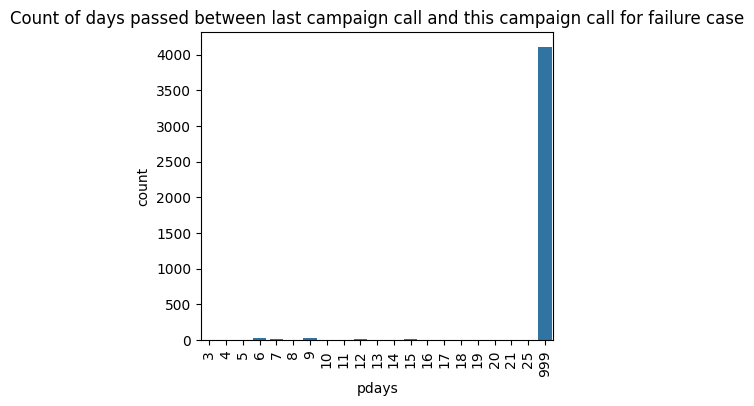

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x ='pdays', data =df3)
plt.xticks(rotation=90)
plt.title("Count of days passed between last campaign call and this campaign call for failure case")
plt.show()

The analysis provides the following insightful findings:

* Call Duration: The majority of calls fell within the range of 0 to 500 seconds or 0 to 8 minutes. The outlying data points in the boxplot were primarily caused by customers who displayed a high level of interest in the bank's campaign, resulting in longer call durations.
* Campaign Duration: The campaign extended over a period of 10 months, from May to September of the following year, with breaks in August-October and December-March.
* Active Month: May stood out as the most active month during the campaign, with the highest number of clients subscribing to a term deposit.
* Duration for Successful Subscriptions: Clients who successfully subscribed to a term deposit were typically contacted for durations ranging from 37 to 900 seconds.
* Success Case Analysis: In successful campaign cases, it was observed that most clients were contacted once before the campaign and once during the campaign. Additionally, there was an average time lapse of 3 to 6 days between the last contact from the previous campaign and the subsequent contact during the current campaign.
* Failure Case Analysis: Conversely, in unsuccessful campaign cases, a significant number of clients had never been contacted during the previous campaign.


##Preparing data for model

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [27]:
categ_data = data.select_dtypes(include = 'object')
num_data = data.select_dtypes(include = ['int', 'float'])

In [28]:
categ_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [29]:
num_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in categ_data.columns:

  encoded_column = label_encoder.fit_transform(categ_data[i])

  categ_data[i] = encoded_column

In [31]:
new_df = pd.concat([categ_data, num_data], axis=1)

new_df = new_df.reset_index(drop=True)

new_df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,1,0,0,0,0,1,6,1,1,...,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,7,1,3,1,0,0,1,6,1,1,...,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,7,1,3,0,2,0,1,6,1,1,...,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,0,1,1,0,0,0,1,6,1,1,...,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,7,1,3,0,0,2,1,6,1,1,...,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [32]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   job             41188 non-null  int64  
 1   marital         41188 non-null  int64  
 2   education       41188 non-null  int64  
 3   default         41188 non-null  int64  
 4   housing         41188 non-null  int64  
 5   loan            41188 non-null  int64  
 6   contact         41188 non-null  int64  
 7   month           41188 non-null  int64  
 8   day_of_week     41188 non-null  int64  
 9   poutcome        41188 non-null  int64  
 10  y               41188 non-null  int64  
 11  age             41188 non-null  int64  
 12  duration        41188 non-null  int64  
 13  campaign        41188 non-null  int64  
 14  pdays           41188 non-null  int64  
 15  previous        41188 non-null  int64  
 16  emp.var.rate    41188 non-null  float64
 17  cons.price.idx  41188 non-null 

In [33]:
new_df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [34]:
X = new_df.drop(columns=['y'])
y = new_df['y']
print('Input shape:', X.shape)
print('Output shape:', y.shape)

Input shape: (41188, 20)
Output shape: (41188,)


##**Scaling data**

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_data, columns=X.columns)
scaled_X.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.272727,0.333333,0.000000,0.0,0.0,0.0,1.0,0.666667,0.25,0.5,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
1,0.636364,0.333333,0.428571,0.5,0.0,0.0,1.0,0.666667,0.25,0.5,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
2,0.636364,0.333333,0.428571,0.0,1.0,0.0,1.0,0.666667,0.25,0.5,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
3,0.000000,0.333333,0.142857,0.0,0.0,0.0,1.0,0.666667,0.25,0.5,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
4,0.636364,0.333333,0.428571,0.0,0.0,1.0,1.0,0.666667,0.25,0.5,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)

##**Build models**

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, r2_score

svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Support Vector Machine Accuracy:", svm_accuracy)


Support Vector Machine Accuracy: 0.8980335032774945


In [38]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)


Decision Tree Accuracy: 0.8973051711580481


In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("k-Nearest Neighbors (KNN) Accuracy:", knn_accuracy)


k-Nearest Neighbors (KNN) Accuracy: 0.9079873755765963


In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest (RF) Accuracy:", rf_accuracy)


Random Forest (RF) Accuracy: 0.9202476329206118


Random forest classifire has the best accuracy. So we will choose it and tune it's parameters

##**Model Evaluation**

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
              'criterion': ['gini', 'entropy','log_loss'],
              'max_depth': [None, 3, 5, 7],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_best_params = grid_search.best_params_
print("Grid Search Best Parameters:", grid_best_params)

Grid Search Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

rf = RandomForestClassifier(criterion='entropy',max_depth = None, min_samples_leaf = 1, min_samples_split = 10)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)



# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)



Mean Absolute Error (MAE): 0.07768875940762321
Mean Squared Error (MSE): 0.07768875940762321
Accuracy: 0.9223112405923768
Precision: 0.9154704249116901
Recall: 0.9223112405923768
F1 Score: 0.9170692201513075


Confusion Matrix:


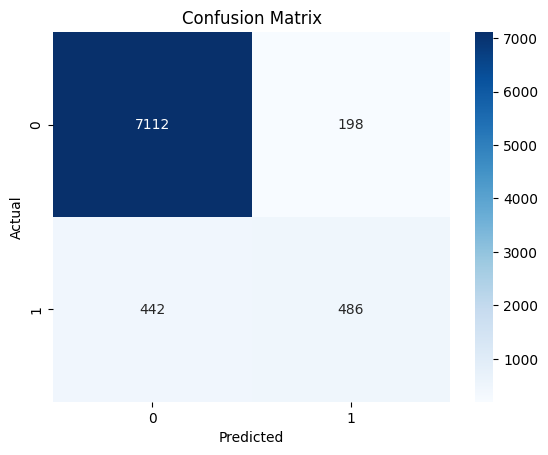

In [42]:
# Calculate Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Despite achieving an overall accuracy of 91%, a closer examination of the confusion matrix reveals a bias towards the 0 class (NO). This bias is evident as the number of samples in the NO class (36537) greatly outweighs the number of samples in the YES class (4639).

To address this issue, we can employ data balancing techniques such as up and down sampling. By performing these techniques, we can create a more balanced dataset where both classes have a similar number of samples, which can improve the model's ability to correctly predict both classes.

In [43]:
category_0 = new_df[new_df['y'] == 0]
category_1 = new_df[new_df['y'] == 1]

#downsampling category 0
category_0_sampled = category_0.sample(n=5000, random_state=42,replace=True)

#upsampling category 1
category_1_sampled = category_1.sample(n=5000, random_state=42,replace=True)

In [44]:
balanced_df = pd.concat([category_0_sampled, category_1_sampled])
balanced_df.y.value_counts()

0    5000
1    5000
Name: y, dtype: int64

In [52]:
X = balanced_df.drop(columns=['y'])
y = balanced_df['y']

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_data, columns=X.columns)
scaled_X.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.636364,0.333333,0.428571,1.0,0.0,0.0,0.0,0.333333,1.00,0.5,0.234568,0.020879,0.050,1.0,0.0,1.0000,0.669135,0.338912,0.981410,1.000000
1,0.636364,0.333333,0.428571,1.0,1.0,0.0,1.0,0.666667,1.00,0.5,0.382716,0.065934,0.000,1.0,0.0,0.9375,0.698753,0.602510,0.957153,0.859735
2,0.818182,0.333333,0.714286,0.0,1.0,0.0,1.0,0.444444,0.00,0.5,0.395062,0.001923,0.325,1.0,0.0,1.0000,0.882307,0.376569,0.980503,1.000000
3,0.181818,0.333333,0.285714,1.0,1.0,0.0,1.0,0.666667,1.00,0.5,0.432099,0.047527,0.025,1.0,0.0,0.9375,0.698753,0.602510,0.957379,0.859735
4,0.909091,0.000000,0.285714,0.0,0.0,0.0,0.0,0.333333,0.25,0.5,0.320988,0.009890,0.200,1.0,0.0,1.0000,0.669135,0.338912,0.981183,1.000000


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)

In [47]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
              'criterion': ['gini', 'entropy','log_loss'],
              'max_depth': [None, 3, 5, 7],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_best_params = grid_search.best_params_
print("Grid Search Best Parameters:", grid_best_params)

Grid Search Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

rf = RandomForestClassifier(criterion='entropy',max_depth = None,
                            min_samples_leaf = 1, min_samples_split = 2)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)



# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)



Mean Absolute Error (MAE): 0.0855
Mean Squared Error (MSE): 0.0855
Accuracy: 0.9145
Precision: 0.9206588664638979
Recall: 0.9145
F1 Score: 0.9141858989365826


Confusion Matrix:


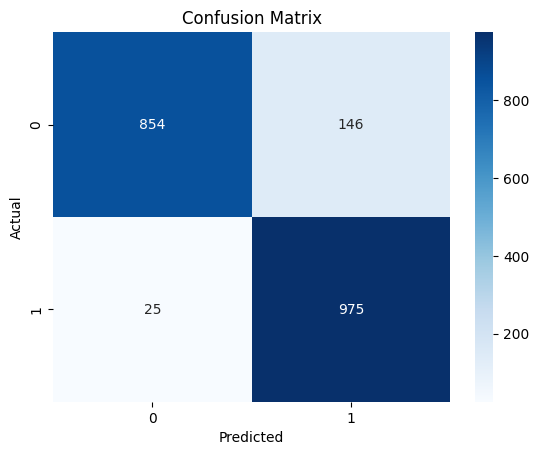

In [56]:
# Calculate Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

We can see that after we make the sampels balanced between NO and YES classes we removed bias and get a better model

## Getting the final model

In [51]:
import pickle

rf = RandomForestClassifier(criterion='entropy',max_depth = None,
                            min_samples_leaf = 1, min_samples_split = 2)
model = rf.fit(X, y)

filename = 'rfmodel.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)